# Practical Session 2: Basic Data Manipulation with Python - Titanic

![Some text here](https://www.encyclopedia-titanica.org/images/titanic-fp-southampton-banner1.jpg)

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City.

Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date.

We will work with real data from the first -and last- voyage of the Titanic, to discover what really happened to the people who sailed on RMS Titanic.

For this project, you should work with your team for some time, then we will share the results with the class.

You can find some more info about the people who sailed on the Titanic here:

https://www.encyclopedia-titanica.org/

Also, the Titanic data is one of the introductory competitions of Kaggle. If you feel like trying to participate you can find the data description below:

https://www.kaggle.com/c/titanic/data

## First things first - show me the data

The data we will work with comprises of information about all the people who sailed with titanic. It is given as a single comma separated values file.

In [1]:
import pandas as pd
titanic = pd.read_csv("TitanicData.csv")

Let's see what we loaded

In [2]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Note that some values are null. We might need to deal with this at some point. Some columns are categorical / string etc (see the "object" ones).

## Exploration

<font color="blue">Describe the numerical columns</font>

In [4]:
# Your Code Here
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color="blue">Make a histogram of the Age of the passengers travelling in the Titanic. Use 15 bins, and change the color of the plot to your liking.</font>

>Hint: have a look at the matplotlib's `plt.hist()` function, or the pandas' `Series.plot.hist()`

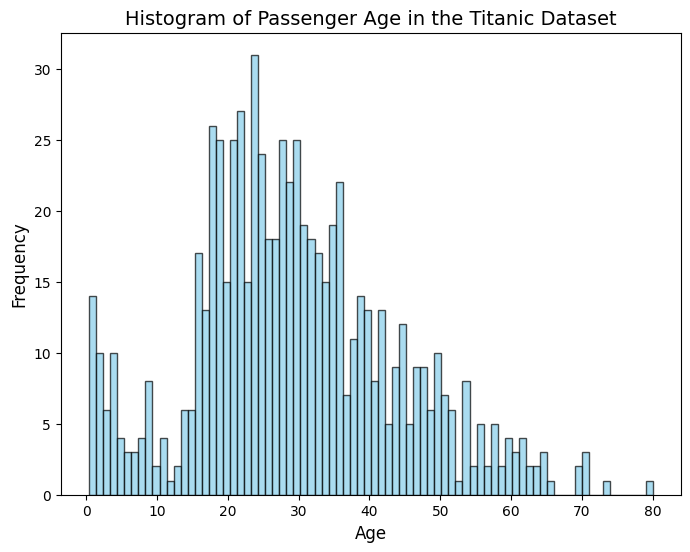

In [45]:
#Your Code Here
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
titanic['Age'].dropna().plot.hist(bins=80, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Histogram of Passenger Age in the Titanic Dataset', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

<font color="blue">Do the same with the fares, then find out what is the value at the 75% percentile (i.e. find the fare X that splits the titanic passengers in two parts: 75% of the passengers paid less than X and 25% paid more)</font>

>Hint: Have a look at the pandas function `Series.quantile()`

In [22]:
#Your Code Here

fare_75th_percentile = titanic['Fare'].quantile(0.75)
print("Fare 75% quantile: ", fare_75th_percentile)


Fare 75% quantile:  31.0


## Surviving the Titanic

<font color="blue">What was the chance of surviving of someone who paid more than 100 GBP for their ticket?</font>

In [26]:
# Your Code Here
high_fare_passengers = titanic[titanic['Fare'] > 100]
survival_rate = high_fare_passengers['Survived'].mean()
print(f"The chance of surviving for someone who paid more than 100 GBP for their ticket is: {survival_rate:.2f}")


The chance of surviving for someone who paid more than 100 GBP for their ticket is: 0.74


<font color="blue">**Exercise:** Make a function that given a fare value of F calculates what percentage of people survived who had paid F or less. Use this function to plot the rate of survival against the fare paid for the fairs up until the 0.75 quantile (75% percentile)</font>

In [40]:
#Your Code here
def chance_based_on_fare(fare): 
    fare_passengers = titanic[titanic['Fare'] > fare]
    return fare_passengers['Survived'].mean()

picked_fare = 0

print(f"The chance of surviving for someone who paid more than ", picked_fare, " GBP for their ticket is: ", round(chance_based_on_fare(picked_fare), 4))

The chance of surviving for someone who paid more than  0  GBP for their ticket is:  0.3893


## Modelling our data

<font color="blue">**Exercise:** Have a look at your plot and look if you believe there are any outliers. If they are, remove them.</font>

---

*Observed outliers:*
 - ther

---

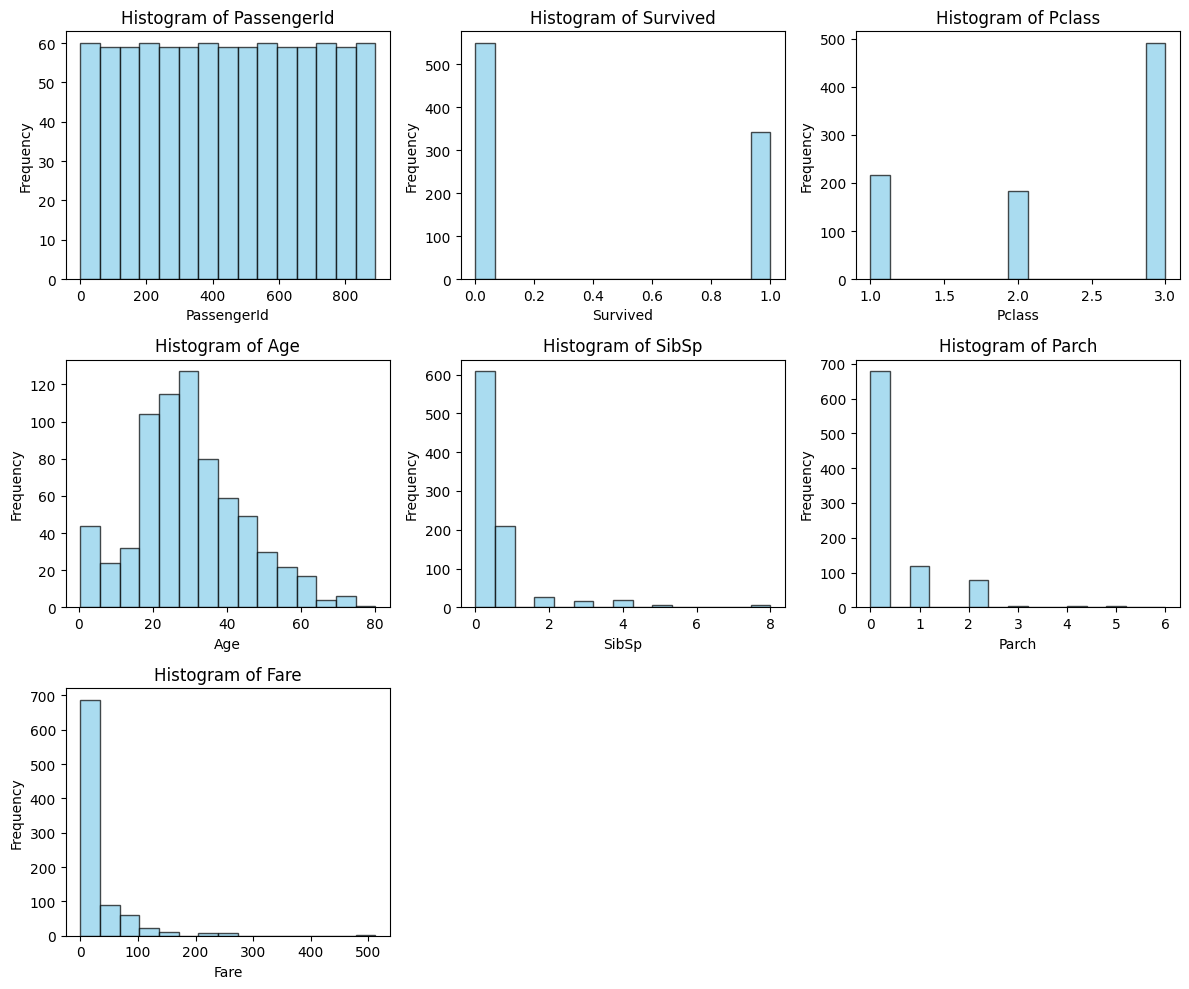

In [46]:
# Your Code Here
numeric_columns = titanic.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i) 
    titanic[column].dropna().plot.hist(bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

## How much would it have cost me to travel first class?

<font color="blue">Add a column with the Fare value in todays GBP. take into account that 1 GBP of 1915 would be worth 114.97 GBP in 2020 (source: https://www.in2013dollars.com/uk/inflation/1915?amount=1) </font>

In [ ]:
#Your Code Here


<font color="blue"> What are the key statistics for the fares in 2020 value of the different classes?</font>

>Hint: Have a look at the pandas `DataFrame.groupby()` function, and use `DataFrame.describe()` to get the key statistics

In [ ]:
#Your Code Here


According to your statistics, what is the minimum price paid by someone travelling in each of the three classes? If you have done this right, you should see that there are passengers that have paid 0 in every class... This is a bit strange, and not good for our statistics. These were probably crew members.

<font color="blue">Print out the names of all passengers that paid 0 fare</font>

In [ ]:
#Your Code Here


<font color="blue"> Calculate again the key statistics for the fares in 2020 value of the different classes, but this time, removing any passengers that have paid a fare of 0.</font>

In [ ]:
#Your Code Here
